In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

import pymeteo
import metpy

import cartopy
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy import plots

from pymeteo.data import acars

%matplotlib inline

In [7]:
 datasets = acars.getAvailableDatasets()

[+] Fetching list of resources available
[-] Parsing list


In [8]:
datasets[-1]

'20220503_1800.gz'

In [9]:
data_url = "https://madis-data.ncep.noaa.gov/madisPublic1/data/point/acars/netcdf/"

In [10]:
setme = acars.getDataSet(datasets[-2])
pset = acars.processDataSet(setme)

[+] Fetching dataset 20220503_1700.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp8gung7fb
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2313 Records
[-] Found 84 profiles
[+] Looking up airport id '140'
[+] Looking up airport id '156'
[+] Looking up airport id '154'
[+] Looking up airport id '84'
[+] Looking up airport id '154'
[+] Looking up airport id '113'
[+] Looking up airport id '350'
[+] Looking up airport id '157'
[+] Looking up airport id '120'
[+] Looking up airport id '120'
[+] Looking up airport id '40'
[+] Looking up airport id '226'
[+] Looking up airport id '40'
[+] Looking up airport id '19'
[+] Looking up airport id '157'
[+] Looking up airport id '139'
[+] Looking up airport id '17'
[+] Looking up airport id '154'
[+] Looking up airport id '106'
[+] Looking up airport id '156'
[+] Looking up airport id '139'
[+] Looking up airport id '87'
[+] Looking up airport id 

In [11]:
pset[-1]

{'i': 83,
 'n': 24,
 'z': array([ 139.     ,  345.     ,  548.     ,  698.00006,  875.     ,
        1020.     , 1246.     , 1514.     , 1782.     , 1907.9999 ,
        2189.     , 2701.     , 3046.     , 3392.0002 , 3958.9998 ,
        4527.     , 5126.     , 5731.9995 , 6333.     , 7002.     ,
        7065.0005 , 7371.     , 7611.     , 7614.     ], dtype=float32),
 'p': array([98275.87 , 95775.21 , 93373.234, 91637.15 , 89630.05 , 88018.61 ,
        85564.56 , 82742.97 , 80014.44 , 78762.9  , 76041.805, 71323.23 ,
        68309.984, 65415.836, 60935.848, 56755.566, 52657.418, 48812.418,
        45276.477, 41640.895, 41313.94 , 39762.074, 38585.816, 38571.336],
       dtype=float32),
 'th': array([301.69385, 301.69415, 301.54373, 301.62543, 301.784  , 301.69138,
        302.67236, 302.31076, 303.72595, 303.91806, 306.22632, 308.57303,
        309.94537, 310.4125 , 311.8088 , 313.73126, 314.8704 , 316.2365 ,
        320.33868, 324.1032 , 324.18973, 324.4989 , 324.66736, 324.4397 ],
  

Text(0, 0.5, 'Height (agl)')

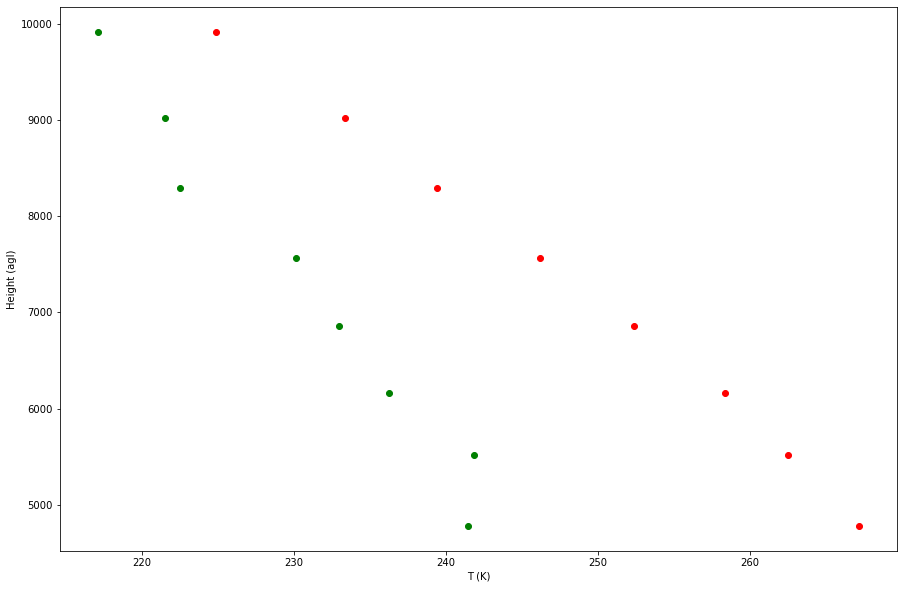

In [12]:
fm = plt.figure(figsize=[15,10])
n=35
T = pymeteo.thermo.T( pset[n]['th'], pset[n]['p'])
Td = pymeteo.thermo.Td( pset[n]['p'], pset[n]['qv'])
plt.plot(T, pset[n]['z'], 'ro')
plt.plot(Td, pset[n]['z'], 'go')

plt.xlabel('T (K)')
plt.ylabel('Height (agl)')

[+] Fetching list of resources available
[-] Parsing list
[+] Fetching dataset 20220503_1500.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp0vssv9a3
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2432 Records
[-] Found 107 profiles
[+] Looking up airport id '120'
[+] Looking up airport id '239'
[+] Looking up airport id '616'
[+] Looking up airport id '111'
[+] Looking up airport id '40'
[+] Looking up airport id '33'
[+] Looking up airport id '145'
[+] Looking up airport id '117'
[+] Looking up airport id '91'
[+] Looking up airport id '239'
[+] Looking up airport id '239'
[+] Looking up airport id '84'
[+] Looking up airport id '40'
[+] Looking up airport id '109'
[+] Looking up airport id '105'
[+] Looking up airport id '105'
[+] Looking up airport id '91'
[+] Looking up airport id '139'
[+] Looking up airport id '109'
[+] Looking up airport id '157'
[+] Looking up airport id '89'


(-89.0, -85.0)

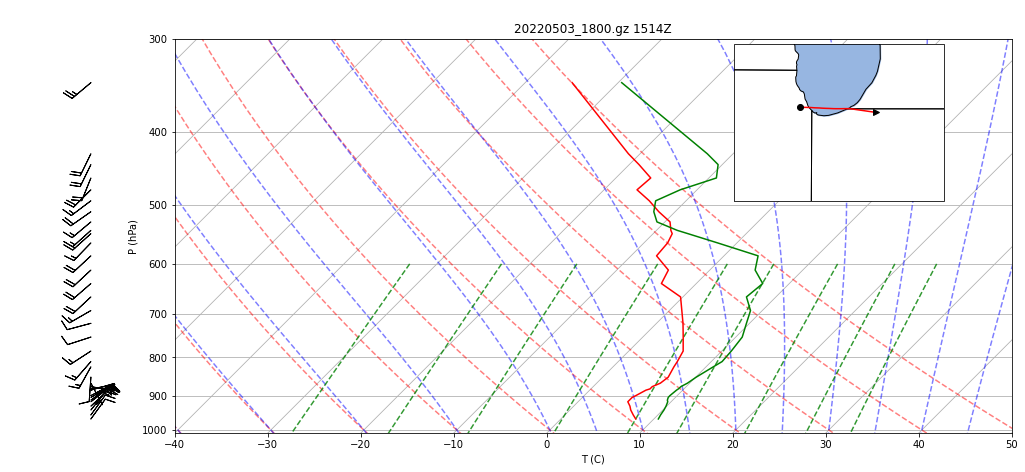

In [14]:
datasets = acars.getAvailableDatasets()
allap = acars.processDataSet(acars.getDataSet(datasets[-4]))
i=0
midway = []
for this_amdar in allap:
    if this_amdar['airport'] == 'MDW':
        this_amdar['dset_file'] = datasets[-1]
        midway.append(this_amdar)
        i+=1
        print('Winner', i)

n = -1
metpy.plots.SkewT
fig=plt.figure(figsize=[15,10])

skew = plots.SkewT(fig, rotation=45)

p = midway[n]['p']
T = pymeteo.thermo.T( midway[n]['th'], midway[n]['p'])
Td = pymeteo.thermo.Td( midway[n]['p'], midway[n]['qv'])
u =  midway[n]['u']
v =  midway[n]['v']


skew.plot(p/100.0, T-273.15, 'r')
skew.plot(p/100.0, Td-273.15, 'g')
skew.plot_barbs(p/100.0, u, v, xloc=-0.1)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


plt.xlabel('T (C)')
plt.ylabel('P (hPa)')
plt.title(midway[n]['dset_file'] + ' ' + midway[n]['time'])

plt.ylim([1010,300])

axins = inset_axes(plt.gca(), width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
axins.plot(midway[n]['lon'], midway[n]['lat'], 'r-')
axins.add_feature(cartopy.feature.LAKES)
axins.add_feature(cartopy.feature.STATES)
plt.plot(midway[n]['lon'][0], midway[n]['lat'][0], 'ko')
plt.plot(midway[n]['lon'][-1], midway[n]['lat'][-1], 'k>')
plt.ylim([40,43])
plt.xlim([-89.,-85])


[+] Fetching list of resources available
[-] Parsing list
[+] Fetching dataset 20220503_1800.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpj3d__6u8
[+] Opening data as NetCDF
[-] Dataset open with
[-] 842 Records
[-] Found 52 profiles
[+] Looking up airport id '140'
[+] Looking up airport id '154'
[+] Looking up airport id '154'
[+] Looking up airport id '350'
[+] Looking up airport id '139'
[+] Looking up airport id '25'
[+] Looking up airport id '40'
[+] Looking up airport id '40'
[+] Looking up airport id '66'
[+] Looking up airport id '154'
[+] Looking up airport id '120'
[+] Looking up airport id '239'
[+] Looking up airport id '39'
[+] Looking up airport id '109'
[+] Looking up airport id '39'
[+] Looking up airport id '126'
[+] Looking up airport id '774'
[+] Looking up airport id '58'
[+] Looking up airport id '109'
[+] Looking up airport id '117'
[+] Looking up airport id '112'
[+

(-94.0, -97.0)

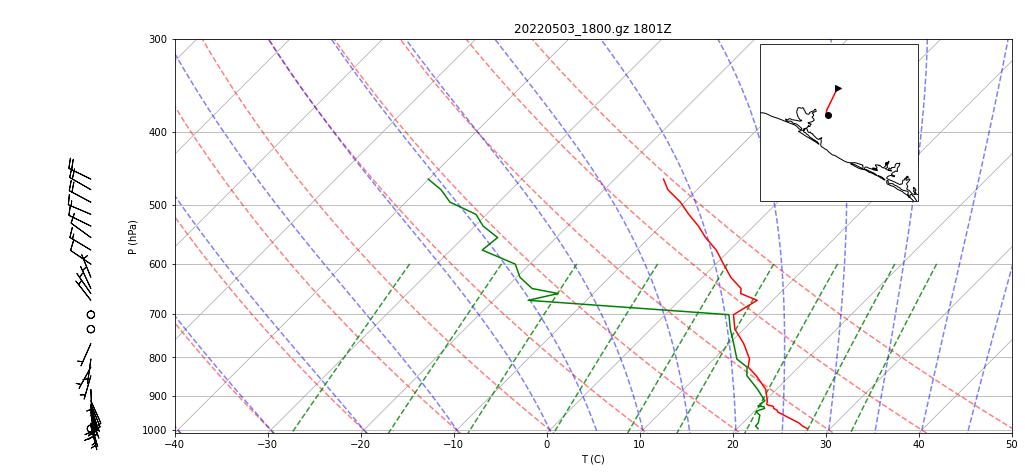

In [15]:
datasets = acars.getAvailableDatasets()
allap = acars.processDataSet(acars.getDataSet(datasets[-1]))
i=0
midway = []
for this_amdar in allap:
    if this_amdar['airport'] == 'HOU':
        this_amdar['dset_file'] = datasets[-1]
        midway.append(this_amdar)
        i+=1
        print('Winner', i)

n = -1
metpy.plots.SkewT
fig=plt.figure(figsize=[15,10])

skew = plots.SkewT(fig, rotation=45)

p = midway[n]['p']
T = pymeteo.thermo.T( midway[n]['th'], midway[n]['p'])
Td = pymeteo.thermo.Td( midway[n]['p'], midway[n]['qv'])
u =  midway[n]['u']
v =  midway[n]['v']


skew.plot(p/100.0, T-273.15, 'r')
skew.plot(p/100.0, Td-273.15, 'g')
skew.plot_barbs(p/100.0, u, v, xloc=-0.1)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


plt.xlabel('T (C)')
plt.ylabel('P (hPa)')
plt.title(midway[n]['dset_file'] + ' ' + midway[n]['time'])

plt.ylim([1010,300])

axins = inset_axes(plt.gca(), width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
axins.plot(midway[n]['lon'], midway[n]['lat'], 'r-')
axins.add_feature(cartopy.feature.LAKES)
axins.add_feature(cartopy.feature.STATES)
plt.plot(midway[n]['lon'][0], midway[n]['lat'][0], 'ko')
plt.plot(midway[n]['lon'][-1], midway[n]['lat'][-1], 'k>')
plt.ylim([28,31])
plt.xlim([-94.,-97])


In [16]:
#Get all Midway soundings
i=0
midway = []
for dsset in datasets:
    print(dsset)
    these_amdars = acars.getDataSet(dsset)
    if these_amdars is not None:
        try:
            for this_amdar in acars.processDataSet(these_amdars):
                if this_amdar['airport'] == 'MDW':
                    this_amdar['dset_file'] = dsset
                    midway.append(this_amdar)
                    i+=1
                    print('Winner', i)
        except:
            print('error prc')
    else:
        print('Sad trombone ', dsset)
    

20220428_0600.gz
[+] Fetching dataset 20220428_0600.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpfdx06w9k
[+] Opening data as NetCDF
[-] Dataset open with
[-] 507 Records
[-] Found 21 profiles
[+] Looking up airport id '616'
[+] Looking up airport id '239'
[+] Looking up airport id '616'
[+] Looking up airport id '143'
[+] Looking up airport id '616'
[+] Looking up airport id '143'
[+] Looking up airport id '143'
[+] Looking up airport id '117'
[+] Looking up airport id '25'
[+] Looking up airport id '147'
[+] Looking up airport id '139'
[+] Looking up airport id '157'
20220428_0700.gz
[+] Fetching dataset 20220428_0700.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp2hm9qwi_
[+] Opening data as NetCDF
[-] Dataset open with
[-] 568 Records
[-] Found 20 profiles
[+] Looking up airport id '117'
[

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpu_cynxwh
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2262 Records
[-] Found 108 profiles
[+] Looking up airport id '217'
[+] Looking up airport id '109'
[+] Looking up airport id '87'
[+] Looking up airport id '113'
[+] Looking up airport id '120'
[+] Looking up airport id '20'
[+] Looking up airport id '120'
[+] Looking up airport id '91'
[+] Looking up airport id '17'
[+] Looking up airport id '31'
[+] Looking up airport id '25'
[+] Looking up airport id '117'
[+] Looking up airport id '69'
[+] Looking up airport id '157'
[+] Looking up airport id '350'
[+] Looking up airport id '84'
[+] Looking up airport id '154'
[+] Looking up airport id '66'
[+] Looking up airport id '350'
[+] Looking up airport id '350'
[+] Looking up airport id '267'
[+] Looking up airport id '267'
[+] Looking up airport id '217'
[+] Looking up airport id '120'
[+

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpgg4p9rjv
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2360 Records
[-] Found 88 profiles
[+] Looking up airport id '39'
[+] Looking up airport id '113'
[+] Looking up airport id '616'
[+] Looking up airport id '91'
[+] Looking up airport id '19'
[+] Looking up airport id '226'
[+] Looking up airport id '114'
[+] Looking up airport id '31'
[+] Looking up airport id '25'
[+] Looking up airport id '109'
[+] Looking up airport id '40'
[+] Looking up airport id '814'
[+] Looking up airport id '40'
[+] Looking up airport id '616'
[+] Looking up airport id '1152'
[+] Looking up airport id '350'
[+] Looking up airport id '2960'
[+] Looking up airport id '350'
[+] Looking up airport id '84'
[+] Looking up airport id '616'
[+] Looking up airport id '40'
[+] Looking up airport id '239'
[+] Looking up airport id '616'
[+] Looking up airport id '616'
[

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpqmhgf805
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2592 Records
[-] Found 95 profiles
[+] Looking up airport id '66'
[+] Looking up airport id '120'
[+] Looking up airport id '33'
[+] Looking up airport id '40'
[+] Looking up airport id '39'
[+] Looking up airport id '40'
[+] Looking up airport id '20'
[+] Looking up airport id '23'
[+] Looking up airport id '40'
[+] Looking up airport id '154'
[+] Looking up airport id '66'
[+] Looking up airport id '106'
[+] Looking up airport id '267'
[+] Looking up airport id '140'
[+] Looking up airport id '50'
[+] Looking up airport id '616'
[+] Looking up airport id '139'
[+] Looking up airport id '25'
[+] Looking up airport id '3373'
Airport not found  3373
[+] Looking up airport id '147'
[+] Looking up airport id '246'
[+] Looking up airport id '29'
[+] Looking up airport id '25'
[+] Looking up

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp4bs4eseg
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2759 Records
[-] Found 110 profiles
[+] Looking up airport id '616'
[+] Looking up airport id '814'
[+] Looking up airport id '267'
[+] Looking up airport id '120'
[+] Looking up airport id '154'
[+] Looking up airport id '127'
[+] Looking up airport id '616'
[+] Looking up airport id '25'
[+] Looking up airport id '39'
[+] Looking up airport id '156'
[+] Looking up airport id '139'
[+] Looking up airport id '267'
[+] Looking up airport id '117'
[+] Looking up airport id '84'
[+] Looking up airport id '147'
[+] Looking up airport id '113'
[+] Looking up airport id '139'
[+] Looking up airport id '17'
[+] Looking up airport id '120'
[+] Looking up airport id '217'
[+] Looking up airport id '226'
[+] Looking up airport id '814'
[+] Looking up airport id '2961'
[+] Looking up airport id '1

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmptpzw33z_
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1048 Records
[-] Found 45 profiles
[+] Looking up airport id '145'
[+] Looking up airport id '239'
[+] Looking up airport id '239'
[+] Looking up airport id '154'
[+] Looking up airport id '2'
[+] Looking up airport id '157'
[+] Looking up airport id '109'
[+] Looking up airport id '267'
[+] Looking up airport id '74'
[+] Looking up airport id '154'
[+] Looking up airport id '120'
[+] Looking up airport id '25'
[+] Looking up airport id '106'
[+] Looking up airport id '130'
[+] Looking up airport id '141'
[+] Looking up airport id '616'
[+] Looking up airport id '19'
[+] Looking up airport id '130'
[+] Looking up airport id '143'
[+] Looking up airport id '120'
[+] Looking up airport id '24'
[+] Looking up airport id '226'
[+] Looking up airport id '120'
[+] Looking up airport id '17'
[

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpqqnx5wyh
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2502 Records
[-] Found 105 profiles
[+] Looking up airport id '1152'
[+] Looking up airport id '350'
[+] Looking up airport id '350'
[+] Looking up airport id '140'
[+] Looking up airport id '111'
[+] Looking up airport id '267'
[+] Looking up airport id '154'
[+] Looking up airport id '25'
[+] Looking up airport id '113'
[+] Looking up airport id '23'
[+] Looking up airport id '25'
[+] Looking up airport id '133'
[+] Looking up airport id '154'
[+] Looking up airport id '226'
[+] Looking up airport id '244'
[+] Looking up airport id '114'
[+] Looking up airport id '84'
[+] Looking up airport id '246'
[+] Looking up airport id '109'
[+] Looking up airport id '133'
[+] Looking up airport id '814'
[+] Looking up airport id '106'
[+] Looking up airport id '246'
[+] Looking up airport id '1

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpb5l16jg8
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2840 Records
[-] Found 136 profiles
[+] Looking up airport id '244'
[+] Looking up airport id '50'
[+] Looking up airport id '140'
[+] Looking up airport id '141'
[+] Looking up airport id '17'
[+] Looking up airport id '50'
[+] Looking up airport id '40'
[+] Looking up airport id '217'
[+] Looking up airport id '24'
[+] Looking up airport id '25'
[+] Looking up airport id '19'
[+] Looking up airport id '1152'
[+] Looking up airport id '156'
[+] Looking up airport id '17'
[+] Looking up airport id '129'
[+] Looking up airport id '139'
[+] Looking up airport id '239'
[+] Looking up airport id '239'
[+] Looking up airport id '147'
[+] Looking up airport id '162'
[+] Looking up airport id '39'
[+] Looking up airport id '1152'
[+] Looking up airport id '120'
[+] Looking up airport id '616'


[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpigi3ss96
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2712 Records
[-] Found 107 profiles
[+] Looking up airport id '25'
[+] Looking up airport id '350'
[+] Looking up airport id '24'
[+] Looking up airport id '88'
[+] Looking up airport id '40'
[+] Looking up airport id '58'
[+] Looking up airport id '11'
[+] Looking up airport id '139'
[+] Looking up airport id '147'
[+] Looking up airport id '217'
[+] Looking up airport id '267'
[+] Looking up airport id '39'
[+] Looking up airport id '89'
[+] Looking up airport id '350'
[+] Looking up airport id '17'
[+] Looking up airport id '147'
[+] Looking up airport id '267'
[+] Looking up airport id '616'
[+] Looking up airport id '24'
[+] Looking up airport id '88'
[+] Looking up airport id '239'
[+] Looking up airport id '40'
[+] Looking up airport id '154'
[+] Looking up airport id '25'
[+] Lo

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpzd062nuw
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2842 Records
[-] Found 106 profiles
[+] Looking up airport id '17'
[+] Looking up airport id '156'
[+] Looking up airport id '239'
[+] Looking up airport id '17'
[+] Looking up airport id '120'
[+] Looking up airport id '40'
[+] Looking up airport id '129'
[+] Looking up airport id '25'
[+] Looking up airport id '616'
[+] Looking up airport id '17'
[+] Looking up airport id '616'
[+] Looking up airport id '74'
[+] Looking up airport id '17'
[+] Looking up airport id '84'
[+] Looking up airport id '147'
[+] Looking up airport id '66'
[+] Looking up airport id '616'
[+] Looking up airport id '24'
[+] Looking up airport id '616'
[+] Looking up airport id '154'
[+] Looking up airport id '84'
[+] Looking up airport id '120'
[+] Looking up airport id '114'
[+] Looking up airport id '106'
[+] 

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpv9wsm8gm
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1036 Records
[-] Found 50 profiles
[+] Looking up airport id '120'
[+] Looking up airport id '239'
[+] Looking up airport id '58'
[+] Looking up airport id '24'
[+] Looking up airport id '244'
[+] Looking up airport id '616'
[+] Looking up airport id '154'
[+] Looking up airport id '616'
[+] Looking up airport id '84'
[+] Looking up airport id '616'
[+] Looking up airport id '616'
[+] Looking up airport id '157'
[+] Looking up airport id '154'
[+] Looking up airport id '239'
[+] Looking up airport id '616'
[+] Looking up airport id '616'
[+] Looking up airport id '139'
[+] Looking up airport id '120'
[+] Looking up airport id '102'
[+] Looking up airport id '267'
[+] Looking up airport id '109'
[+] Looking up airport id '113'
[+] Looking up airport id '616'
[+] Looking up airport id '11

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpzgm5dzhl
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2372 Records
[-] Found 109 profiles
[+] Looking up airport id '120'
[+] Looking up airport id '239'
[+] Looking up airport id '40'
[+] Looking up airport id '66'
[+] Looking up airport id '350'
[+] Looking up airport id '40'
[+] Looking up airport id '66'
[+] Looking up airport id '17'
[+] Looking up airport id '141'
[+] Looking up airport id '88'
[+] Looking up airport id '97'
[+] Looking up airport id '25'
[+] Looking up airport id '109'
[+] Looking up airport id '226'
[+] Looking up airport id '39'
[+] Looking up airport id '120'
[+] Looking up airport id '156'
[+] Looking up airport id '1152'
[+] Looking up airport id '157'
[+] Looking up airport id '84'
[+] Looking up airport id '154'
[+] Looking up airport id '24'
[+] Looking up airport id '113'
[+] Looking up airport id '88'
[+] 

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp0a2fw2e_
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2509 Records
[-] Found 100 profiles
[+] Looking up airport id '99'
[+] Looking up airport id '109'
[+] Looking up airport id '147'
[+] Looking up airport id '63'
[+] Looking up airport id '154'
[+] Looking up airport id '88'
[+] Looking up airport id '814'
[+] Looking up airport id '282'
[+] Looking up airport id '107'
[+] Looking up airport id '107'
[+] Looking up airport id '292'
[+] Looking up airport id '157'
[+] Looking up airport id '120'
[+] Looking up airport id '119'
[+] Looking up airport id '111'
[+] Looking up airport id '157'
[+] Looking up airport id '2'
[+] Looking up airport id '120'
[+] Looking up airport id '145'
[+] Looking up airport id '226'
[+] Looking up airport id '24'
[+] Looking up airport id '120'
[+] Looking up airport id '350'
[+] Looking up airport id '296'

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpy_8n488i
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1968 Records
[-] Found 70 profiles
[+] Looking up airport id '25'
[+] Looking up airport id '239'
[+] Looking up airport id '145'
[+] Looking up airport id '116'
[+] Looking up airport id '153'
[+] Looking up airport id '814'
[+] Looking up airport id '226'
[+] Looking up airport id '40'
[+] Looking up airport id '126'
[+] Looking up airport id '39'
[+] Looking up airport id '24'
[+] Looking up airport id '139'
[+] Looking up airport id '120'
[+] Looking up airport id '17'
[+] Looking up airport id '11'
[+] Looking up airport id '17'
[+] Looking up airport id '139'
[+] Looking up airport id '226'
[+] Looking up airport id '296'
[+] Looking up airport id '40'
[+] Looking up airport id '111'
[+] Looking up airport id '40'
[+] Looking up airport id '98'
[+] Looking up airport id '1152'
[+]

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpgl92jwj0
[+] Opening data as NetCDF
[-] Dataset open with
[-] 23 Records
[-] Found 1 profiles
20220501_0900.gz
[+] Fetching dataset 20220501_0900.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpb0v8xhqi
[+] Opening data as NetCDF
[-] Dataset open with
[-] 63 Records
[-] Found 4 profiles
[+] Looking up airport id '33'
[+] Looking up airport id '127'
[+] Looking up airport id '226'
[+] Looking up airport id '126'
20220501_1000.gz
[+] Fetching dataset 20220501_1000.gz
[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpjlx4oqj2
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1061 Records
[-] Found 54 profiles
[+] Looking up airport id '91'
[+] Looking up airport i

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpox9tj9f_
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2287 Records
[-] Found 95 profiles
[+] Looking up airport id '24'
[+] Looking up airport id '109'
[+] Looking up airport id '239'
[+] Looking up airport id '25'
[+] Looking up airport id '127'
[+] Looking up airport id '226'
[+] Looking up airport id '154'
[+] Looking up airport id '1152'
[+] Looking up airport id '616'
[+] Looking up airport id '239'
[+] Looking up airport id '113'
[+] Looking up airport id '66'
[+] Looking up airport id '616'
[+] Looking up airport id '267'
[+] Looking up airport id '814'
[+] Looking up airport id '156'
[+] Looking up airport id '154'
[+] Looking up airport id '143'
[+] Looking up airport id '29'
[+] Looking up airport id '350'
[+] Looking up airport id '66'
[+] Looking up airport id '156'
[+] Looking up airport id '154'
[+] Looking up airport id '140

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmplz4t22ce
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2349 Records
[-] Found 97 profiles
[+] Looking up airport id '51'
[+] Looking up airport id '246'
[+] Looking up airport id '217'
[+] Looking up airport id '154'
[+] Looking up airport id '120'
[+] Looking up airport id '109'
[+] Looking up airport id '117'
[+] Looking up airport id '40'
[+] Looking up airport id '74'
[+] Looking up airport id '24'
[+] Looking up airport id '24'
[+] Looking up airport id '239'
[+] Looking up airport id '50'
[+] Looking up airport id '156'
[+] Looking up airport id '267'
[+] Looking up airport id '63'
[+] Looking up airport id '2960'
[+] Looking up airport id '17'
[+] Looking up airport id '350'
[+] Looking up airport id '109'
[+] Looking up airport id '7'
[+] Looking up airport id '40'
[+] Looking up airport id '95'
[+] Looking up airport id '84'
[+] Lo

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp9q4w6nxj
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2485 Records
[-] Found 109 profiles
[+] Looking up airport id '113'
[+] Looking up airport id '153'
[+] Looking up airport id '129'
[+] Looking up airport id '120'
[+] Looking up airport id '39'
[+] Looking up airport id '157'
[+] Looking up airport id '814'
[+] Looking up airport id '217'
[+] Looking up airport id '217'
[+] Looking up airport id '39'
[+] Looking up airport id '66'
[+] Looking up airport id '88'
[+] Looking up airport id '24'
[+] Looking up airport id '109'
[+] Looking up airport id '25'
[+] Looking up airport id '17'
[+] Looking up airport id '246'
[+] Looking up airport id '40'
[+] Looking up airport id '25'
[+] Looking up airport id '120'
[+] Looking up airport id '616'
[+] Looking up airport id '350'
[+] Looking up airport id '350'
[+] Looking up airport id '147'
[+

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp_qpiaomd
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2150 Records
[-] Found 90 profiles
[+] Looking up airport id '24'
[+] Looking up airport id '120'
[+] Looking up airport id '139'
[+] Looking up airport id '24'
[+] Looking up airport id '66'
[+] Looking up airport id '116'
[+] Looking up airport id '17'
[+] Looking up airport id '814'
[+] Looking up airport id '350'
[+] Looking up airport id '109'
[+] Looking up airport id '117'
[+] Looking up airport id '88'
[+] Looking up airport id '154'
[+] Looking up airport id '163'
[+] Looking up airport id '616'
[+] Looking up airport id '25'
[+] Looking up airport id '109'
[+] Looking up airport id '40'
[+] Looking up airport id '25'
[+] Looking up airport id '1152'
[+] Looking up airport id '120'
[+] Looking up airport id '814'
[+] Looking up airport id '350'
[+] Looking up airport id '24'
[+

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmprapfub06
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1904 Records
[-] Found 70 profiles
[+] Looking up airport id '616'
[+] Looking up airport id '157'
[+] Looking up airport id '50'
[+] Looking up airport id '39'
[+] Looking up airport id '25'
[+] Looking up airport id '17'
[+] Looking up airport id '157'
[+] Looking up airport id '120'
[+] Looking up airport id '267'
[+] Looking up airport id '66'
[+] Looking up airport id '217'
[+] Looking up airport id '17'
[+] Looking up airport id '246'
[+] Looking up airport id '153'
[+] Looking up airport id '120'
[+] Looking up airport id '66'
[+] Looking up airport id '217'
[+] Looking up airport id '40'
[+] Looking up airport id '217'
[+] Looking up airport id '157'
[+] Looking up airport id '814'
[+] Looking up airport id '44'
[+] Looking up airport id '109'
[+] Looking up airport id '40'
[+] 

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpn891zduy
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2629 Records
[-] Found 113 profiles
[+] Looking up airport id '109'
[+] Looking up airport id '31'
[+] Looking up airport id '31'
[+] Looking up airport id '139'
[+] Looking up airport id '616'
[+] Looking up airport id '24'
[+] Looking up airport id '1152'
[+] Looking up airport id '154'
[+] Looking up airport id '24'
[+] Looking up airport id '50'
[+] Looking up airport id '217'
[+] Looking up airport id '17'
[+] Looking up airport id '350'
[+] Looking up airport id '39'
[+] Looking up airport id '244'
[+] Looking up airport id '350'
[+] Looking up airport id '25'
[+] Looking up airport id '109'
[+] Looking up airport id '226'
[+] Looking up airport id '91'
[+] Looking up airport id '350'
[+] Looking up airport id '66'
[+] Looking up airport id '267'
[+] Looking up airport id '20'
[+]

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp30_pt5k1
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2405 Records
[-] Found 100 profiles
[+] Looking up airport id '154'
[+] Looking up airport id '36'
[+] Looking up airport id '25'
[+] Looking up airport id '226'
[+] Looking up airport id '139'
[+] Looking up airport id '17'
[+] Looking up airport id '147'
[+] Looking up airport id '217'
[+] Looking up airport id '239'
[+] Looking up airport id '153'
[+] Looking up airport id '2'
[+] Looking up airport id '246'
[+] Looking up airport id '3373'
Airport not found  3373
[+] Looking up airport id '17'
[+] Looking up airport id '40'
[+] Looking up airport id '25'
[+] Looking up airport id '140'
[+] Looking up airport id '25'
[+] Looking up airport id '106'
[+] Looking up airport id '84'
[+] Looking up airport id '154'
[+] Looking up airport id '117'
[+] Looking up airport id '66'
[+] Looking

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpyzz0hy8s
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2691 Records
[-] Found 119 profiles
[+] Looking up airport id '24'
[+] Looking up airport id '99'
[+] Looking up airport id '616'
[+] Looking up airport id '33'
[+] Looking up airport id '99'
[+] Looking up airport id '24'
[+] Looking up airport id '24'
[+] Looking up airport id '226'
[+] Looking up airport id '120'
[+] Looking up airport id '217'
[+] Looking up airport id '244'
[+] Looking up airport id '17'
[+] Looking up airport id '1152'
[+] Looking up airport id '106'
[+] Looking up airport id '88'
[+] Looking up airport id '113'
[+] Looking up airport id '113'
[+] Looking up airport id '25'
[+] Looking up airport id '350'
[+] Looking up airport id '66'
[+] Looking up airport id '157'
[+] Looking up airport id '154'
[+] Looking up airport id '1152'
[+] Looking up airport id '25'
[+

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpsbvch2rs
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2074 Records
[-] Found 92 profiles
[+] Looking up airport id '133'
[+] Looking up airport id '120'
[+] Looking up airport id '616'
[+] Looking up airport id '147'
[+] Looking up airport id '147'
[+] Looking up airport id '147'
[+] Looking up airport id '40'
[+] Looking up airport id '814'
[+] Looking up airport id '267'
[+] Looking up airport id '616'
[+] Looking up airport id '117'
[+] Looking up airport id '106'
[+] Looking up airport id '139'
[+] Looking up airport id '139'
[+] Looking up airport id '131'
[+] Looking up airport id '24'
[+] Looking up airport id '25'
[+] Looking up airport id '40'
[+] Looking up airport id '292'
[+] Looking up airport id '109'
[+] Looking up airport id '51'
[+] Looking up airport id '145'
[+] Looking up airport id '40'
[+] Looking up airport id '350'


[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmp4iingttr
[+] Opening data as NetCDF
[-] Dataset open with
[-] 1988 Records
[-] Found 98 profiles
[+] Looking up airport id '2960'
[+] Looking up airport id '350'
[+] Looking up airport id '814'
[+] Looking up airport id '112'
[+] Looking up airport id '106'
[+] Looking up airport id '350'
[+] Looking up airport id '162'
[+] Looking up airport id '217'
[+] Looking up airport id '25'
[+] Looking up airport id '226'
[+] Looking up airport id '1152'
[+] Looking up airport id '814'
[+] Looking up airport id '78'
[+] Looking up airport id '25'
[+] Looking up airport id '126'
[+] Looking up airport id '40'
[+] Looking up airport id '292'
[+] Looking up airport id '159'
[+] Looking up airport id '109'
[+] Looking up airport id '350'
[+] Looking up airport id '105'
[+] Looking up airport id '77'
[+] Looking up airport id '143'
[+] Looking up airport id '22

[-] Decompressing response data
[+] Writing data into temporary file
[-] Data written to /var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/tmpiutwn6pv
[+] Opening data as NetCDF
[-] Dataset open with
[-] 2432 Records
[-] Found 107 profiles
[+] Looking up airport id '120'
[+] Looking up airport id '239'
[+] Looking up airport id '616'
[+] Looking up airport id '111'
[+] Looking up airport id '40'
[+] Looking up airport id '33'
[+] Looking up airport id '145'
[+] Looking up airport id '117'
[+] Looking up airport id '91'
[+] Looking up airport id '239'
[+] Looking up airport id '239'
[+] Looking up airport id '84'
[+] Looking up airport id '40'
[+] Looking up airport id '109'
[+] Looking up airport id '105'
[+] Looking up airport id '105'
[+] Looking up airport id '91'
[+] Looking up airport id '139'
[+] Looking up airport id '109'
[+] Looking up airport id '157'
[+] Looking up airport id '89'
[+] Looking up airport id '140'
[+] Looking up airport id '17'
[+] Looking up airport id '87'
[+

In [17]:
len(midway)

172